In [1]:
import pandas as pd

In [199]:
gdp = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
gdp.head(35)

,COUNTRY,GDP (BILLIONS),CODE
0,Afghanistan,21.71,AFG
1,Albania,13.40,ALB
2,Algeria,227.80,DZA
3,American Samoa,0.75,ASM
4,Andorra,4.80,AND
5,Angola,131.40,AGO
6,Anguilla,0.18,AIA
7,Antigua and Barbuda,1.24,ATG
8,Argentina,536.20,ARG
9,Armenia,10.88,ARM


In [18]:
gdp.describe()

,GDP (BILLIONS)
count,222.000000
mean,352.637162
std,1464.855533
min,0.010000
25%,4.615000
50%,21.525000
75%,196.200000
max,17420.000000


In [19]:
gdp.shape #this indicates the size of the dataset 

(222, 3)

In [20]:
gdp.dtypes

COUNTRY            object
GDP (BILLIONS)    float64
CODE               object
dtype: object

In [32]:
gdp['GDP (BILLIONS)'] = gdp['GDP (BILLIONS)'].astype(int)
gdp.dtypes

COUNTRY           object
GDP (BILLIONS)     int64
CODE              object
dtype: object

In [36]:
gdp.cols = ['Country', 'GDP', 'Code']
gdp.columns = gdp.cols
gdp.columns
gdp.head(5)

,Country,GDP,Code
0,Afghanistan,21,AFG
1,Albania,13,ALB
2,Algeria,227,DZA
3,American Samoa,0,ASM
4,Andorra,4,AND


In [46]:
for index, row in gdp.iterrows():
    if(row.GDP > 1000):
        print(row.Country, row.GDP, "billion")
#displays all nations with a GDP over 1 trillion USD

Australia 1483 billion
Brazil 2244 billion
Canada 1794 billion
China 10360 billion
France 2902 billion
Germany 3820 billion
India 2048 billion
Italy 2129 billion
Japan 4770 billion
Korea, South 1410 billion
Mexico 1296 billion
Russia 2057 billion
Spain 1400 billion
United Kingdom 2848 billion
United States 17420 billion


In [53]:
import numpy as np
gdp.select_dtypes(include=[np.int]).dtypes
gdp.describe()

,GDP
count,222.000000
mean,352.211712
std,1464.932672
min,0.000000
25%,4.000000
50%,21.000000
75%,196.000000
max,17420.000000


In [69]:
topten = gdp.drop('Code', axis=1).sort_values('GDP', ascending = False).head(10) 
topten
#temporarily drop the Codes from dataset
#Sorts the values based on higher GDP and gives the top 10

,Country,GDP
211,United States,17420
42,China,10360
101,Japan,4770
75,Germany,3820
70,France,2902
210,United Kingdom,2848
27,Brazil,2244
99,Italy,2129
164,Russia,2057
92,India,2048


In [131]:
#GDP Per Capita
#plan- create list containing populations for the top ten nations and 
#append it as a series, create a new series calculating GDP per capita,
#rerank the nations based on highest to lowest of GDP per capita

pops = {'United States': 329, 'China': 1430, 'Japan': 127, 'Germany': 81, 'France': 65, 'United Kingdom':67, 
        'Brazil':212, 'Italy': 59, 'Russia': 144, 'India': 1369}
topPop = []
for key,val in pops.items():
   # print("{} = {}".format(key, val))
    topPop.append(val)
topPop 


[329, 1430, 127, 81, 65, 67, 212, 59, 144, 1369]

In [159]:

#pd.DataFrame.add(gdp, topPop, axis = 'columns' level=None, fill_value=None)
#topten['Population'] = pd.Series(np.random.randn(10), index=topten.index)
topten['Population'] = pd.Series(topPop, index=topten.index)
topten

,Country,GDP,Population,Per_Capita
211,United States,17420,329,329
42,China,10360,1430,1430
101,Japan,4770,127,127
75,Germany,3820,81,81
70,France,2902,65,65
210,United Kingdom,2848,67,67
27,Brazil,2244,212,212
99,Italy,2129,59,59
164,Russia,2057,144,144
92,India,2048,1369,1369


In [178]:

#Per_Capita = []
#for pop in topPop:
    #Per_Capita.append(topten.GDP/pop)
   # Per_Capita.append(pop)
    
#topten['Per_Capita'] = pd.Series(Per_Capita, index=topten.index)
#topten

In [179]:
topten["Per_Capita"] = topten.GDP/topten.Population
topten.head()

,Country,GDP,Population,Per_Capita
211,United States,17420,329,52.948328
42,China,10360,1430,7.244755
101,Japan,4770,127,37.559055
75,Germany,3820,81,47.160494
70,France,2902,65,44.646154


In [187]:
%matplotlib inline 

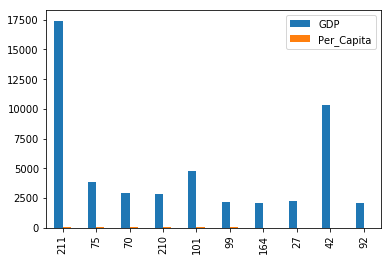

In [197]:
topten.plot(kind='bar')

In [96]:
trade = []
for length in gdp.GDP:
    if length >=2048:
        trade.append(True)
    else:
        trade.append(False)
    
top10 = pd.Series(trade)
print(top10.head(10))

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
dtype: bool


In [ ]:
##################

In [81]:
gdp.Code.describe()

count     222
unique    221
top       VGB
freq        2
Name: Code, dtype: object

In [85]:
gdp.GDP.value_counts(normalize = True).tail(10) #displays as percents

2848    0.004505
134     0.004505
400     0.004505
402     0.004505
45      0.004505
2057    0.004505
416     0.004505
4770    0.004505
679     0.004505
2902    0.004505
Name: GDP, dtype: float64

In [86]:
%matplotlib inline #plots now possible

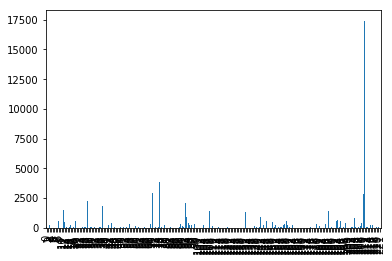

In [87]:
gdp.GDP.plot(kind='bar')

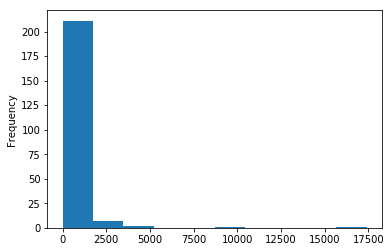

In [88]:
gdp.GDP.plot(kind = 'hist')

In [90]:
gdp.isnull().sum() #shows that all data is there- no missing numbers

Country    0
GDP        0
Code       0
dtype: int64

In [110]:
print(gdp.index)

RangeIndex(start=0, stop=222, step=1)


In [111]:
gdp.columns

Index(['Country', 'GDP', 'Code'], dtype='object')